In [1]:
"""
=============================================
Basic Trajectory Plotting and Using MapDesign
=============================================

How to quickly initialize a matplotlib Basemap with the ``MapDesign``
class and plot ``Trajectory`` paths.

For this example we'll initialize only the January trajectories created in
``bulk_trajgen_example.py``.

"""
# %%

import pysplit

In [2]:
trajgroup = pysplit.make_trajectorygroup('/Users/diego/pysplit/example_data/Archive/*')

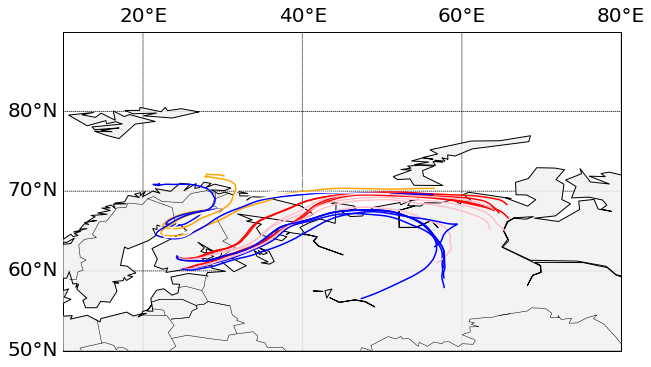

In [4]:
"""
Basemaps and MapDesign
----------------------
PySPLIT's ``MapDesign`` class uses the matplotlib Basemap toolkit to quickly
set up attractive maps.  The user is not restricted to using maps
produced from ``MapDesign``, however- any Basemap will serve in the section
below entitled 'Plotting ``Trajectory`` Paths.

Creating a basic cylindrical map using ``MapDesign``  only requires
``mapcorners``, a list of the lower-left longitude, lower-left latitude,
upper-right longitude, and upper-right latitude values.
The ``standard_pm``, a list of standard parallels and meridians,
may be passed as ``None``.

"""
mapcorners =  [10, 50, 80, 90]
standard_pm = None

bmap_params = pysplit.MapDesign(mapcorners, standard_pm)

"""
Once the ``MapDesign`` is initialized it can be used to draw a map:

"""
bmap = bmap_params.make_basemap()

"""
Plotting ``Trajectory`` Paths
-----------------------------
For this example, we will color-code by initialization (t=0) altitude,
(500, 1000, or 1500 m), which can be accessed via ``Trajectory.data.geometry``,
 a ``GeoSeries`` of Shapely ``Point`` objects.

We can store the trajectory color in ``Trajectory.trajcolor`` for convenience.

"""
# %%

color_dict = {
    100.0: 'red',
    250.0: 'pink',
    300.0 : 'white',
    500.0 : 'blue',
    400.0 : 'orange',
    1500.0 : 'black'}
# %%

for traj in trajgroup:
    altitude0 = traj.data.geometry.apply(lambda p: p.z)[0]
#     print(altitude0)
    traj.trajcolor = color_dict[altitude0]
# %%

"""
For display purposes, let's plot only every fifth ``Trajectory``.  The lats,
lons are obtained by unpacking the ``Trajectory.Path``
(Shapely ``LineString``) xy coordinates.

"""
for traj in trajgroup[::5]:
    bmap.plot(*traj.path.xy, c=traj.trajcolor, latlon=True, zorder=20)

import matplotlib.pyplot as plt
plt.show()